# 4.4 기울기(p. 127)

In [ ]:
import numpy as np

In [ ]:
# f(x_0, x_1) = x_0^2 + x_1^2

def function_2(x):
    return x[0]**2 + x[1]**2

In [ ]:
# 기울기 구하기
# 함수 f와 값 x를 받음.
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x) # x와 모양이 같은 0으로 된 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]

        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 원상복구
    
    return grad

In [ ]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 0.])

In [ ]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [ ]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

numerical_gradient 코드를 numerical_gradient(function_2, np.array([3.0, 4.0])) 관점에서 생각해보자면,

먼저 x[0]인 3.0에 대해서, 3.0 + h를 x[0]에 저장하고, 이에 대해서 f(3.0+h)를 계산해서 fxh1로 만들어준다.

다음으로 3.0 - h를 x[0]에 저장하고, 이에 대해서 f(3.0 - h)를 fxh2로 만들어준다.

그리고 grad[0] = (f(3.0 + h) - f(3.0 - h)) / 2h 로 계산해준다.

이 코드의 핵심은, 내가 편미분하고 싶은 변수를 제외한 나머지 변수의 값들은 원래 값 그대로를 들고 간다는 점이라고 생각하면 좋을듯하다.

해당 도서의 공식 github에 가보니, 배치 단위로 계산하는 코드도 나와있었다.

(https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch04/gradient_2d.py)

따라서 배치 단위로 계산하는 코드도 직접 짜서 돌려보았다.

In [ ]:
# 위에서 numerical_gradient로 만들었던 코드랑 동일하다.

def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

# 배치 형태면 각 배치마다 np.sum을 계산해줌
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


In [ ]:
# numerical_gradient를 2차원으로 작동할 때는 이렇게 작동함.
# 즉, 배치 중에서 한 개씩 꺼내와서 아까처럼 numerical gradient를 계산하는 식으로 작동.
sample = [[3.0, 4.0], [3.0, 0.0]]

for index, x in enumerate(sample):
    print(index)
    print(x)

0
[3.0, 4.0]
1
[3.0, 0.0]


In [ ]:
# 3배치로 편미분을 계산시켰을 때 결과

numerical_gradient(function_2, np.array([[3.0, 4.0], [0.0, 2.0], [3.0, 0.0]]))

array([[6., 8.],
       [0., 4.],
       [6., 0.]])

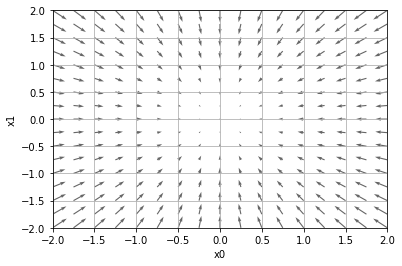

In [ ]:
import matplotlib.pyplot as plt

x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
# np.meshgrid는 격자점을 만드는 함수. 추후 별개로 공부할 필요 있어보임
X, Y = np.meshgrid(x0, x1)

X = X.flatten() # (324, )
Y = Y.flatten() # (324, )


grad = numerical_gradient(function_2, np.array([X, Y]) ) # (2, 324)

    
plt.figure()
# plt.quiver는 gradient vector를 그리는데 유용하게 사용할 수 있는 화살표 그림을 그려줌
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy", color="#666666")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.draw()
plt.show()

## 4.4.1 경사 하강법(p. 129)

In [ ]:
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
    x = init_x  # x를 x의 초기값으로 지정

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad # x 값 갱신

    return x

In [ ]:
init_x = np.array([-3.0 , 4.0])

gradient_descent(function_2, init_x = init_x , lr = 0.1, step_num = 100)

array([-6.11110793e-10,  8.14814391e-10])

책에 나온 그림을 그리는 코드는 위 코드에서 약간만 바꿔주면 됩니다.

즉 x의 변화를 모두 데이터로 가지고 있어야 하므로, 이를 x_history라는 변수에 저장하는 방법을 취합니다.

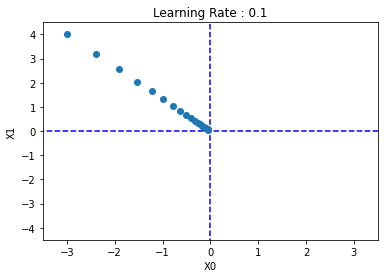

In [ ]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.title("Learning Rate : 0.1")
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

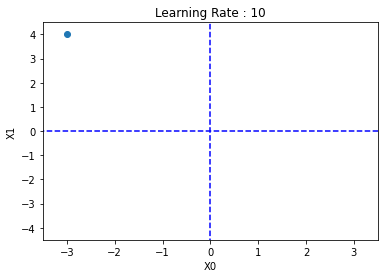

최종 위치:  [-2.58983747e+13 -1.29524862e+12]


In [ ]:
# Learning Rate가 매우 큰 경우
init_x = np.array([-3.0, 4.0])
step_num = 100
x, x_history = gradient_descent(function_2, init_x, lr=10.0, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.title("Learning Rate : 10")
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()
print("최종 위치: ", x)

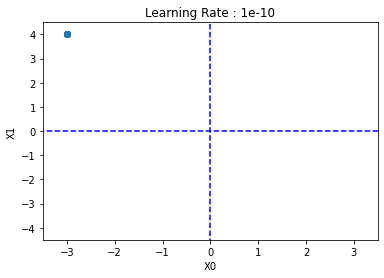

최종 위치:  [-2.99999994  3.99999992]


In [ ]:
init_x = np.array([-3.0, 4.0])
step_num = 100
x, x_history = gradient_descent(function_2, init_x, lr=1e-10, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.title("Learning Rate : 1e-10")
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()
print("최종 위치: ", x)

## 4.4.2 신경망에서의 기울기(p. 133)

In [ ]:
import numpy as np

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

class simpleNet:
    def __init__(self):
        self.W = np.array([[0.47355232, 0.9977393, 0.84668094], [0.85557411, 0.03563661, 0.69422093]])

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

In [ ]:
net = simpleNet()
print("W: ", net.W)

x = np.array([0.6, 0.9])
p = net.predict(x)
print("예측값: ", p)

t = np.array([0, 0, 1])
net.loss(x, t)

W:  [[0.47355232 0.9977393  0.84668094]
 [0.85557411 0.03563661 0.69422093]]
예측값:  [1.05414809 0.63071653 1.1328074 ]


0.9280682857864075

In [ ]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.21925592  0.14355928 -0.3628152 ]
 [ 0.32888388  0.21533892 -0.5442228 ]]
